# Deep Q-Learning 

Install dependencies for AI gym to run properly (shouldn't take more than a minute). If running on google cloud or running locally, only need to run once. Colab may require installing everytime the vm shuts down.

In [2]:
!pip3 install gym pyvirtualdisplay
!sudo apt-get install -y xvfb python-opengl ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-opengl is already the newest version (3.1.0+dfsg-1).
ffmpeg is already the newest version (7:3.4.8-0ubuntu0.2).
xvfb is already the newest version (2:1.19.6-1ubuntu4.8).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [3]:
!pip3 install --upgrade setuptools
!pip3 install ez_setup 
!pip3 install gym[atari] 

Requirement already up-to-date: setuptools in /usr/local/lib/python3.6/dist-packages (51.0.0)


For this assignment we will implement the Deep Q-Learning algorithm with Experience Replay as described in breakthrough paper __"Playing Atari with Deep Reinforcement Learning"__. We will train an agent to play the famous game of __Breakout__.

In [4]:
%matplotlib inline

import sys
import gym
import torch
import pylab
import random
import numpy as np
from collections import deque
from datetime import datetime
from copy import deepcopy
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
from utils import find_max_lives, check_live, get_frame, get_init_state
from model import DQN
from config import *

import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Understanding the environment

In the following cell, we initialize our game of __Breakout__ and you can see how the environment looks like. For further documentation of the of the environment refer to https://gym.openai.com/envs. 

In breakout, we will use 3 actions "fire", "left", and "right". "fire" is only used to reset the game when a life is lost, "left" moves the agent left and "right" moves the agent right.

In [5]:
env = gym.make('BreakoutDeterministic-v4')
state = env.reset()

In [6]:
number_lives = find_max_lives(env)
state_size = env.observation_space.shape
action_size = 3 #fire, left, and right

## Creating a DQN Agent

Here we create a DQN Agent. This agent is defined in the __agent.py__. The corresponding neural network is defined in the __model.py__. Once you've created a working DQN agent, use the code in agent.py to create a double DQN agent in __agent_double.py__. Set the flag "double_dqn" to True to train the double DQN agent.

__Evaluation Reward__ : The average reward received in the past 100 episodes/games.

__Frame__ : Number of frames processed in total.

__Memory Size__ : The current size of the replay memory.

In [7]:
double_dqn = True # set to True if using double DQN agent

if double_dqn:
    from agent_double import Agent
else:
    from agent import Agent

agent = Agent(action_size)
evaluation_reward = deque(maxlen=evaluation_reward_length)
frame = 0
memory_size = 0

### Main Training Loop

In this training loop, we do not render the screen because it slows down training signficantly. To watch the agent play the game, run the code in next section "Visualize Agent Performance"

# DDQN

episode: 0   score: 3.0   memory length: 262   epsilon: 1.0    steps: 262    lr: 0.0001     evaluation reward: 3.0
episode: 1   score: 2.0   memory length: 460   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 2.5
episode: 2   score: 1.0   memory length: 629   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 2.0
episode: 3   score: 1.0   memory length: 798   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.75
episode: 4   score: 0.0   memory length: 920   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.4
episode: 5   score: 0.0   memory length: 1042   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.1666666666666667
episode: 6   score: 0.0   memory length: 1165   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.0
episode: 7   score: 5.0   memory length: 1483   epsilon: 1.0    steps: 318    lr: 0.0001     evaluation reward: 1.5
episode: 8   score: 2.0   memory length: 1681   epsilon: 1.0 

episode: 65   score: 4.0   memory length: 11637   epsilon: 1.0    steps: 275    lr: 0.0001     evaluation reward: 1.3636363636363635
episode: 66   score: 0.0   memory length: 11760   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.3432835820895523
episode: 67   score: 0.0   memory length: 11883   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.3235294117647058
episode: 68   score: 2.0   memory length: 12081   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 1.3333333333333333
episode: 69   score: 0.0   memory length: 12204   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.3142857142857143
episode: 70   score: 0.0   memory length: 12327   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.295774647887324
episode: 71   score: 3.0   memory length: 12574   epsilon: 1.0    steps: 247    lr: 0.0001     evaluation reward: 1.3194444444444444
episode: 72   score: 2.0   memory length: 12794   epsilon: 1.0    step

episode: 131   score: 2.0   memory length: 23181   epsilon: 1.0    steps: 219    lr: 0.0001     evaluation reward: 1.28
episode: 132   score: 2.0   memory length: 23399   epsilon: 1.0    steps: 218    lr: 0.0001     evaluation reward: 1.28
episode: 133   score: 2.0   memory length: 23597   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 1.28
episode: 134   score: 1.0   memory length: 23766   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.28
episode: 135   score: 1.0   memory length: 23935   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.29
episode: 136   score: 0.0   memory length: 24057   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.27
episode: 137   score: 1.0   memory length: 24208   epsilon: 1.0    steps: 151    lr: 0.0001     evaluation reward: 1.28
episode: 138   score: 0.0   memory length: 24331   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.27
episode: 139   score: 2.0   memory lengt

episode: 200   score: 3.0   memory length: 35994   epsilon: 1.0    steps: 229    lr: 0.0001     evaluation reward: 1.52
episode: 201   score: 0.0   memory length: 36117   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.51
episode: 202   score: 4.0   memory length: 36413   epsilon: 1.0    steps: 296    lr: 0.0001     evaluation reward: 1.55
episode: 203   score: 0.0   memory length: 36536   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.54
episode: 204   score: 1.0   memory length: 36706   epsilon: 1.0    steps: 170    lr: 0.0001     evaluation reward: 1.55
episode: 205   score: 0.0   memory length: 36829   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.55
episode: 206   score: 0.0   memory length: 36952   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.55
episode: 207   score: 3.0   memory length: 37199   epsilon: 1.0    steps: 247    lr: 0.0001     evaluation reward: 1.58
episode: 208   score: 5.0   memory lengt

episode: 269   score: 0.0   memory length: 47553   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.31
episode: 270   score: 1.0   memory length: 47722   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.3
episode: 271   score: 3.0   memory length: 47969   epsilon: 1.0    steps: 247    lr: 0.0001     evaluation reward: 1.33
episode: 272   score: 0.0   memory length: 48091   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.33
episode: 273   score: 0.0   memory length: 48214   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.29
episode: 274   score: 0.0   memory length: 48336   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.28
episode: 275   score: 1.0   memory length: 48487   epsilon: 1.0    steps: 151    lr: 0.0001     evaluation reward: 1.29
episode: 276   score: 2.0   memory length: 48706   epsilon: 1.0    steps: 219    lr: 0.0001     evaluation reward: 1.31
episode: 277   score: 4.0   memory length

episode: 338   score: 6.0   memory length: 60860   epsilon: 1.0    steps: 355    lr: 0.0001     evaluation reward: 1.54
episode: 339   score: 2.0   memory length: 61057   epsilon: 1.0    steps: 197    lr: 0.0001     evaluation reward: 1.54
episode: 340   score: 2.0   memory length: 61239   epsilon: 1.0    steps: 182    lr: 0.0001     evaluation reward: 1.55
episode: 341   score: 3.0   memory length: 61468   epsilon: 1.0    steps: 229    lr: 0.0001     evaluation reward: 1.57
episode: 342   score: 1.0   memory length: 61619   epsilon: 1.0    steps: 151    lr: 0.0001     evaluation reward: 1.58
episode: 343   score: 2.0   memory length: 61801   epsilon: 1.0    steps: 182    lr: 0.0001     evaluation reward: 1.57
episode: 344   score: 0.0   memory length: 61924   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.55
episode: 345   score: 3.0   memory length: 62150   epsilon: 1.0    steps: 226    lr: 0.0001     evaluation reward: 1.58
episode: 346   score: 1.0   memory lengt

episode: 407   score: 2.0   memory length: 73348   epsilon: 1.0    steps: 181    lr: 0.0001     evaluation reward: 1.6
episode: 408   score: 2.0   memory length: 73548   epsilon: 1.0    steps: 200    lr: 0.0001     evaluation reward: 1.62
episode: 409   score: 1.0   memory length: 73700   epsilon: 1.0    steps: 152    lr: 0.0001     evaluation reward: 1.62
episode: 410   score: 0.0   memory length: 73823   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.62
episode: 411   score: 1.0   memory length: 73974   epsilon: 1.0    steps: 151    lr: 0.0001     evaluation reward: 1.62
episode: 412   score: 0.0   memory length: 74097   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.57
episode: 413   score: 3.0   memory length: 74345   epsilon: 1.0    steps: 248    lr: 0.0001     evaluation reward: 1.57
episode: 414   score: 0.0   memory length: 74468   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.57
episode: 415   score: 3.0   memory length

episode: 476   score: 0.0   memory length: 86669   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.61
episode: 477   score: 0.0   memory length: 86792   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.6
episode: 478   score: 1.0   memory length: 86960   epsilon: 1.0    steps: 168    lr: 0.0001     evaluation reward: 1.59
episode: 479   score: 0.0   memory length: 87082   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.59
episode: 480   score: 1.0   memory length: 87233   epsilon: 1.0    steps: 151    lr: 0.0001     evaluation reward: 1.59
episode: 481   score: 1.0   memory length: 87402   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.57
episode: 482   score: 1.0   memory length: 87571   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.58
episode: 483   score: 2.0   memory length: 87768   epsilon: 1.0    steps: 197    lr: 0.0001     evaluation reward: 1.56
episode: 484   score: 0.0   memory length

episode: 545   score: 0.0   memory length: 99850   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.63
episode: 546   score: 0.0   memory length: 99972   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.61
episode: 547   score: 3.0   memory length: 100220   epsilon: 0.9995624200000095    steps: 248    lr: 0.0001     evaluation reward: 1.63
episode: 548   score: 2.0   memory length: 100438   epsilon: 0.9991307800000189    steps: 218    lr: 0.0001     evaluation reward: 1.65
episode: 549   score: 3.0   memory length: 100684   epsilon: 0.9986437000000294    steps: 246    lr: 0.0001     evaluation reward: 1.68
episode: 550   score: 2.0   memory length: 100881   epsilon: 0.9982536400000379    steps: 197    lr: 0.0001     evaluation reward: 1.68
episode: 551   score: 2.0   memory length: 101078   epsilon: 0.9978635800000464    steps: 197    lr: 0.0001     evaluation reward: 1.69
episode: 552   score: 4.0   memory length: 101375   epsilon: 0.9972755200000591 

episode: 606   score: 0.0   memory length: 110975   epsilon: 0.9782675200004718    steps: 123    lr: 0.0001     evaluation reward: 1.55
episode: 607   score: 2.0   memory length: 111173   epsilon: 0.9778754800004803    steps: 198    lr: 0.0001     evaluation reward: 1.54
episode: 608   score: 2.0   memory length: 111389   epsilon: 0.9774478000004896    steps: 216    lr: 0.0001     evaluation reward: 1.52
episode: 609   score: 1.0   memory length: 111540   epsilon: 0.9771488200004961    steps: 151    lr: 0.0001     evaluation reward: 1.5
episode: 610   score: 2.0   memory length: 111740   epsilon: 0.9767528200005047    steps: 200    lr: 0.0001     evaluation reward: 1.5
episode: 611   score: 0.0   memory length: 111863   epsilon: 0.97650928000051    steps: 123    lr: 0.0001     evaluation reward: 1.5
episode: 612   score: 2.0   memory length: 112043   epsilon: 0.9761528800005177    steps: 180    lr: 0.0001     evaluation reward: 1.52
episode: 613   score: 0.0   memory length: 112165   e

episode: 667   score: 0.0   memory length: 122562   epsilon: 0.9553252600009698    steps: 123    lr: 0.0001     evaluation reward: 1.52
episode: 668   score: 0.0   memory length: 122685   epsilon: 0.9550817200009751    steps: 123    lr: 0.0001     evaluation reward: 1.52
episode: 669   score: 1.0   memory length: 122836   epsilon: 0.9547827400009816    steps: 151    lr: 0.0001     evaluation reward: 1.52
episode: 670   score: 5.0   memory length: 123178   epsilon: 0.9541055800009963    steps: 342    lr: 0.0001     evaluation reward: 1.56
episode: 671   score: 2.0   memory length: 123398   epsilon: 0.9536699800010058    steps: 220    lr: 0.0001     evaluation reward: 1.53
episode: 672   score: 4.0   memory length: 123677   epsilon: 0.9531175600010178    steps: 279    lr: 0.0001     evaluation reward: 1.55
episode: 673   score: 1.0   memory length: 123845   epsilon: 0.952784920001025    steps: 168    lr: 0.0001     evaluation reward: 1.56
episode: 674   score: 0.0   memory length: 123968

episode: 728   score: 0.0   memory length: 133633   epsilon: 0.9334046800014457    steps: 123    lr: 0.0001     evaluation reward: 1.54
episode: 729   score: 0.0   memory length: 133756   epsilon: 0.933161140001451    steps: 123    lr: 0.0001     evaluation reward: 1.54
episode: 730   score: 1.0   memory length: 133906   epsilon: 0.9328641400014575    steps: 150    lr: 0.0001     evaluation reward: 1.53
episode: 731   score: 0.0   memory length: 134029   epsilon: 0.9326206000014627    steps: 123    lr: 0.0001     evaluation reward: 1.52
episode: 732   score: 3.0   memory length: 134281   epsilon: 0.9321216400014736    steps: 252    lr: 0.0001     evaluation reward: 1.52
episode: 733   score: 0.0   memory length: 134404   epsilon: 0.9318781000014789    steps: 123    lr: 0.0001     evaluation reward: 1.48
episode: 734   score: 2.0   memory length: 134620   epsilon: 0.9314504200014881    steps: 216    lr: 0.0001     evaluation reward: 1.5
episode: 735   score: 1.0   memory length: 134788 

episode: 789   score: 1.0   memory length: 144593   epsilon: 0.9117038800019168    steps: 169    lr: 0.0001     evaluation reward: 1.35
episode: 790   score: 2.0   memory length: 144811   epsilon: 0.9112722400019262    steps: 218    lr: 0.0001     evaluation reward: 1.36
episode: 791   score: 6.0   memory length: 145174   epsilon: 0.9105535000019418    steps: 363    lr: 0.0001     evaluation reward: 1.41
episode: 792   score: 1.0   memory length: 145324   epsilon: 0.9102565000019482    steps: 150    lr: 0.0001     evaluation reward: 1.4
episode: 793   score: 4.0   memory length: 145612   epsilon: 0.9096862600019606    steps: 288    lr: 0.0001     evaluation reward: 1.42
episode: 794   score: 1.0   memory length: 145784   epsilon: 0.909345700001968    steps: 172    lr: 0.0001     evaluation reward: 1.41
episode: 795   score: 1.0   memory length: 145952   epsilon: 0.9090130600019752    steps: 168    lr: 0.0001     evaluation reward: 1.42
episode: 796   score: 2.0   memory length: 146149 

episode: 850   score: 1.0   memory length: 157513   epsilon: 0.8861222800024722    steps: 151    lr: 0.0001     evaluation reward: 1.89
episode: 851   score: 2.0   memory length: 157734   epsilon: 0.8856847000024817    steps: 221    lr: 0.0001     evaluation reward: 1.89
episode: 852   score: 4.0   memory length: 158012   epsilon: 0.8851342600024936    steps: 278    lr: 0.0001     evaluation reward: 1.92
episode: 853   score: 7.0   memory length: 158438   epsilon: 0.8842907800025119    steps: 426    lr: 0.0001     evaluation reward: 1.97
episode: 854   score: 2.0   memory length: 158638   epsilon: 0.8838947800025205    steps: 200    lr: 0.0001     evaluation reward: 1.99
episode: 855   score: 1.0   memory length: 158807   epsilon: 0.8835601600025278    steps: 169    lr: 0.0001     evaluation reward: 1.99
episode: 856   score: 2.0   memory length: 159009   epsilon: 0.8831602000025365    steps: 202    lr: 0.0001     evaluation reward: 1.98
episode: 857   score: 3.0   memory length: 15925

episode: 911   score: 0.0   memory length: 170778   epsilon: 0.8598575800030424    steps: 123    lr: 0.0001     evaluation reward: 2.37
episode: 912   score: 2.0   memory length: 170975   epsilon: 0.8594675200030508    steps: 197    lr: 0.0001     evaluation reward: 2.38
episode: 913   score: 1.0   memory length: 171126   epsilon: 0.8591685400030573    steps: 151    lr: 0.0001     evaluation reward: 2.38
episode: 914   score: 2.0   memory length: 171344   epsilon: 0.8587369000030667    steps: 218    lr: 0.0001     evaluation reward: 2.38
episode: 915   score: 4.0   memory length: 171640   epsilon: 0.8581508200030794    steps: 296    lr: 0.0001     evaluation reward: 2.4
episode: 916   score: 3.0   memory length: 171886   epsilon: 0.85766374000309    steps: 246    lr: 0.0001     evaluation reward: 2.39
episode: 917   score: 4.0   memory length: 172145   epsilon: 0.8571509200031011    steps: 259    lr: 0.0001     evaluation reward: 2.39
episode: 918   score: 5.0   memory length: 172484  

episode: 972   score: 0.0   memory length: 184159   epsilon: 0.8333632000036175    steps: 123    lr: 0.0001     evaluation reward: 2.34
episode: 973   score: 2.0   memory length: 184359   epsilon: 0.8329672000036261    steps: 200    lr: 0.0001     evaluation reward: 2.34
episode: 974   score: 3.0   memory length: 184584   epsilon: 0.8325217000036358    steps: 225    lr: 0.0001     evaluation reward: 2.36
episode: 975   score: 1.0   memory length: 184753   epsilon: 0.832187080003643    steps: 169    lr: 0.0001     evaluation reward: 2.34
episode: 976   score: 6.0   memory length: 185144   epsilon: 0.8314129000036599    steps: 391    lr: 0.0001     evaluation reward: 2.36
episode: 977   score: 3.0   memory length: 185370   epsilon: 0.8309654200036696    steps: 226    lr: 0.0001     evaluation reward: 2.37
episode: 978   score: 4.0   memory length: 185648   epsilon: 0.8304149800036815    steps: 278    lr: 0.0001     evaluation reward: 2.4
episode: 979   score: 3.0   memory length: 185897 

episode: 1033   score: 4.0   memory length: 199004   epsilon: 0.8039701000042556    steps: 316    lr: 0.0001     evaluation reward: 2.83
episode: 1034   score: 4.0   memory length: 199284   epsilon: 0.8034157000042677    steps: 280    lr: 0.0001     evaluation reward: 2.85
episode: 1035   score: 4.0   memory length: 199541   epsilon: 0.8029068400042787    steps: 257    lr: 0.0001     evaluation reward: 2.84
episode: 1036   score: 4.0   memory length: 199801   epsilon: 0.8023920400042899    steps: 260    lr: 0.0001     evaluation reward: 2.82
episode: 1037   score: 1.0   memory length: 199970   epsilon: 0.8020574200042971    steps: 169    lr: 0.0001     evaluation reward: 2.78
episode: 1038   score: 3.0   memory length: 200199   epsilon: 0.801604000004307    steps: 229    lr: 4e-05     evaluation reward: 2.77
episode: 1039   score: 2.0   memory length: 200381   epsilon: 0.8012436400043148    steps: 182    lr: 4e-05     evaluation reward: 2.79
episode: 1040   score: 4.0   memory length: 

episode: 1094   score: 4.0   memory length: 214924   epsilon: 0.7724485000049399    steps: 295    lr: 4e-05     evaluation reward: 3.28
episode: 1095   score: 5.0   memory length: 215266   epsilon: 0.7717713400049546    steps: 342    lr: 4e-05     evaluation reward: 3.31
episode: 1096   score: 7.0   memory length: 215712   epsilon: 0.7708882600049738    steps: 446    lr: 4e-05     evaluation reward: 3.36
episode: 1097   score: 4.0   memory length: 216006   epsilon: 0.7703061400049864    steps: 294    lr: 4e-05     evaluation reward: 3.35
episode: 1098   score: 8.0   memory length: 216463   epsilon: 0.7694012800050061    steps: 457    lr: 4e-05     evaluation reward: 3.43
episode: 1099   score: 3.0   memory length: 216713   epsilon: 0.7689062800050168    steps: 250    lr: 4e-05     evaluation reward: 3.43
episode: 1100   score: 2.0   memory length: 216929   epsilon: 0.7684786000050261    steps: 216    lr: 4e-05     evaluation reward: 3.41
episode: 1101   score: 4.0   memory length: 2172

episode: 1155   score: 0.0   memory length: 230939   epsilon: 0.7407388000056283    steps: 122    lr: 4e-05     evaluation reward: 3.61
episode: 1156   score: 3.0   memory length: 231171   epsilon: 0.7402794400056383    steps: 232    lr: 4e-05     evaluation reward: 3.59
episode: 1157   score: 4.0   memory length: 231433   epsilon: 0.7397606800056495    steps: 262    lr: 4e-05     evaluation reward: 3.6
episode: 1158   score: 1.0   memory length: 231602   epsilon: 0.7394260600056568    steps: 169    lr: 4e-05     evaluation reward: 3.58
episode: 1159   score: 4.0   memory length: 231898   epsilon: 0.7388399800056695    steps: 296    lr: 4e-05     evaluation reward: 3.59
episode: 1160   score: 4.0   memory length: 232179   epsilon: 0.7382836000056816    steps: 281    lr: 4e-05     evaluation reward: 3.61
episode: 1161   score: 7.0   memory length: 232590   epsilon: 0.7374698200056993    steps: 411    lr: 4e-05     evaluation reward: 3.66
episode: 1162   score: 1.0   memory length: 23275

episode: 1216   score: 4.0   memory length: 247473   epsilon: 0.708001480006339    steps: 273    lr: 4e-05     evaluation reward: 3.73
episode: 1217   score: 3.0   memory length: 247741   epsilon: 0.7074708400063505    steps: 268    lr: 4e-05     evaluation reward: 3.72
episode: 1218   score: 7.0   memory length: 248142   epsilon: 0.7066768600063678    steps: 401    lr: 4e-05     evaluation reward: 3.77
episode: 1219   score: 3.0   memory length: 248388   epsilon: 0.7061897800063783    steps: 246    lr: 4e-05     evaluation reward: 3.79
episode: 1220   score: 4.0   memory length: 248686   epsilon: 0.7055997400063911    steps: 298    lr: 4e-05     evaluation reward: 3.8
episode: 1221   score: 10.0   memory length: 249208   epsilon: 0.7045661800064136    steps: 522    lr: 4e-05     evaluation reward: 3.85
episode: 1222   score: 6.0   memory length: 249543   epsilon: 0.703902880006428    steps: 335    lr: 4e-05     evaluation reward: 3.88
episode: 1223   score: 3.0   memory length: 249771

episode: 1277   score: 5.0   memory length: 265678   epsilon: 0.6719555800071215    steps: 364    lr: 4e-05     evaluation reward: 4.26
episode: 1278   score: 4.0   memory length: 265971   epsilon: 0.6713754400071341    steps: 293    lr: 4e-05     evaluation reward: 4.28
episode: 1279   score: 11.0   memory length: 266472   epsilon: 0.6703834600071557    steps: 501    lr: 4e-05     evaluation reward: 4.33
episode: 1280   score: 2.0   memory length: 266652   epsilon: 0.6700270600071634    steps: 180    lr: 4e-05     evaluation reward: 4.32
episode: 1281   score: 5.0   memory length: 266971   epsilon: 0.6693954400071771    steps: 319    lr: 4e-05     evaluation reward: 4.34
episode: 1282   score: 3.0   memory length: 267221   epsilon: 0.6689004400071878    steps: 250    lr: 4e-05     evaluation reward: 4.33
episode: 1283   score: 4.0   memory length: 267479   epsilon: 0.6683896000071989    steps: 258    lr: 4e-05     evaluation reward: 4.35
episode: 1284   score: 6.0   memory length: 267

episode: 1338   score: 6.0   memory length: 283310   epsilon: 0.6370442200078794    steps: 377    lr: 4e-05     evaluation reward: 4.31
episode: 1339   score: 4.0   memory length: 283586   epsilon: 0.6364977400078913    steps: 276    lr: 4e-05     evaluation reward: 4.33
episode: 1340   score: 3.0   memory length: 283812   epsilon: 0.636050260007901    steps: 226    lr: 4e-05     evaluation reward: 4.3
episode: 1341   score: 5.0   memory length: 284139   epsilon: 0.635402800007915    steps: 327    lr: 4e-05     evaluation reward: 4.33
episode: 1342   score: 5.0   memory length: 284463   epsilon: 0.634761280007929    steps: 324    lr: 4e-05     evaluation reward: 4.3
episode: 1343   score: 6.0   memory length: 284823   epsilon: 0.6340484800079444    steps: 360    lr: 4e-05     evaluation reward: 4.32
episode: 1344   score: 3.0   memory length: 285052   epsilon: 0.6335950600079543    steps: 229    lr: 4e-05     evaluation reward: 4.34
episode: 1345   score: 1.0   memory length: 285202   

episode: 1398   score: 7.0   memory length: 301831   epsilon: 0.6003726400086755    steps: 419    lr: 1.6000000000000003e-05     evaluation reward: 4.67
episode: 1399   score: 3.0   memory length: 302041   epsilon: 0.5999568400086845    steps: 210    lr: 1.6000000000000003e-05     evaluation reward: 4.67
episode: 1400   score: 6.0   memory length: 302431   epsilon: 0.5991846400087013    steps: 390    lr: 1.6000000000000003e-05     evaluation reward: 4.68
episode: 1401   score: 7.0   memory length: 302874   epsilon: 0.5983075000087203    steps: 443    lr: 1.6000000000000003e-05     evaluation reward: 4.7
episode: 1402   score: 7.0   memory length: 303276   epsilon: 0.5975115400087376    steps: 402    lr: 1.6000000000000003e-05     evaluation reward: 4.75
episode: 1403   score: 4.0   memory length: 303526   epsilon: 0.5970165400087484    steps: 250    lr: 1.6000000000000003e-05     evaluation reward: 4.76
episode: 1404   score: 7.0   memory length: 303955   epsilon: 0.5961671200087668   

episode: 1452   score: 4.0   memory length: 320070   epsilon: 0.5642594200094595    steps: 257    lr: 1.6000000000000003e-05     evaluation reward: 5.48
episode: 1453   score: 7.0   memory length: 320448   epsilon: 0.5635109800094757    steps: 378    lr: 1.6000000000000003e-05     evaluation reward: 5.49
episode: 1454   score: 1.0   memory length: 320618   epsilon: 0.563174380009483    steps: 170    lr: 1.6000000000000003e-05     evaluation reward: 5.45
episode: 1455   score: 4.0   memory length: 320892   epsilon: 0.5626318600094948    steps: 274    lr: 1.6000000000000003e-05     evaluation reward: 5.47
episode: 1456   score: 8.0   memory length: 321332   epsilon: 0.5617606600095137    steps: 440    lr: 1.6000000000000003e-05     evaluation reward: 5.49
episode: 1457   score: 3.0   memory length: 321544   epsilon: 0.5613409000095229    steps: 212    lr: 1.6000000000000003e-05     evaluation reward: 5.46
episode: 1458   score: 10.0   memory length: 322074   epsilon: 0.5602915000095456  

episode: 1506   score: 10.0   memory length: 339349   epsilon: 0.5260870000102882    steps: 500    lr: 1.6000000000000003e-05     evaluation reward: 6.0
episode: 1507   score: 8.0   memory length: 339808   epsilon: 0.5251781800103079    steps: 459    lr: 1.6000000000000003e-05     evaluation reward: 6.03
episode: 1508   score: 4.0   memory length: 340068   epsilon: 0.5246633800103191    steps: 260    lr: 1.6000000000000003e-05     evaluation reward: 6.01
episode: 1509   score: 6.0   memory length: 340401   epsilon: 0.5240040400103334    steps: 333    lr: 1.6000000000000003e-05     evaluation reward: 6.01
episode: 1510   score: 7.0   memory length: 340828   epsilon: 0.5231585800103518    steps: 427    lr: 1.6000000000000003e-05     evaluation reward: 6.02
episode: 1511   score: 6.0   memory length: 341183   epsilon: 0.522455680010367    steps: 355    lr: 1.6000000000000003e-05     evaluation reward: 6.01
episode: 1512   score: 4.0   memory length: 341441   epsilon: 0.5219448400103781   

episode: 1560   score: 5.0   memory length: 358854   epsilon: 0.4874671000107752    steps: 308    lr: 1.6000000000000003e-05     evaluation reward: 6.43
episode: 1561   score: 2.0   memory length: 359034   epsilon: 0.48711070001077295    steps: 180    lr: 1.6000000000000003e-05     evaluation reward: 6.42
episode: 1562   score: 7.0   memory length: 359437   epsilon: 0.4863127600107679    steps: 403    lr: 1.6000000000000003e-05     evaluation reward: 6.45
episode: 1563   score: 6.0   memory length: 359739   epsilon: 0.4857148000107641    steps: 302    lr: 1.6000000000000003e-05     evaluation reward: 6.44
episode: 1564   score: 6.0   memory length: 360094   epsilon: 0.48501190001075967    steps: 355    lr: 1.6000000000000003e-05     evaluation reward: 6.44
episode: 1565   score: 3.0   memory length: 360303   epsilon: 0.48459808001075705    steps: 209    lr: 1.6000000000000003e-05     evaluation reward: 6.44
episode: 1566   score: 4.0   memory length: 360566   epsilon: 0.484077340010753

episode: 1614   score: 10.0   memory length: 378061   epsilon: 0.4494372400105346    steps: 483    lr: 1.6000000000000003e-05     evaluation reward: 6.39
episode: 1615   score: 9.0   memory length: 378563   epsilon: 0.4484432800105283    steps: 502    lr: 1.6000000000000003e-05     evaluation reward: 6.37
episode: 1616   score: 8.0   memory length: 378979   epsilon: 0.4476196000105231    steps: 416    lr: 1.6000000000000003e-05     evaluation reward: 6.36
episode: 1617   score: 5.0   memory length: 379321   epsilon: 0.4469424400105188    steps: 342    lr: 1.6000000000000003e-05     evaluation reward: 6.34
episode: 1618   score: 5.0   memory length: 379612   epsilon: 0.44636626001051516    steps: 291    lr: 1.6000000000000003e-05     evaluation reward: 6.33
episode: 1619   score: 4.0   memory length: 379907   epsilon: 0.44578216001051146    steps: 295    lr: 1.6000000000000003e-05     evaluation reward: 6.28
episode: 1620   score: 5.0   memory length: 380235   epsilon: 0.445132720010507

episode: 1668   score: 4.0   memory length: 397808   epsilon: 0.4103381800102872    steps: 242    lr: 1.6000000000000003e-05     evaluation reward: 6.65
episode: 1669   score: 3.0   memory length: 398019   epsilon: 0.40992040001028457    steps: 211    lr: 1.6000000000000003e-05     evaluation reward: 6.62
episode: 1670   score: 5.0   memory length: 398326   epsilon: 0.4093125400102807    steps: 307    lr: 1.6000000000000003e-05     evaluation reward: 6.6
episode: 1671   score: 10.0   memory length: 398867   epsilon: 0.40824136001027395    steps: 541    lr: 1.6000000000000003e-05     evaluation reward: 6.54
episode: 1672   score: 6.0   memory length: 399204   epsilon: 0.4075741000102697    steps: 337    lr: 1.6000000000000003e-05     evaluation reward: 6.57
episode: 1673   score: 11.0   memory length: 399732   epsilon: 0.4065286600102631    steps: 528    lr: 1.6000000000000003e-05     evaluation reward: 6.62
episode: 1674   score: 4.0   memory length: 399974   epsilon: 0.406049500010260

episode: 1722   score: 10.0   memory length: 419890   epsilon: 0.3666158200100106    steps: 527    lr: 6.400000000000001e-06     evaluation reward: 7.31
episode: 1723   score: 11.0   memory length: 420413   epsilon: 0.36558028001000403    steps: 523    lr: 6.400000000000001e-06     evaluation reward: 7.34
episode: 1724   score: 5.0   memory length: 420688   epsilon: 0.3650357800100006    steps: 275    lr: 6.400000000000001e-06     evaluation reward: 7.32
episode: 1725   score: 5.0   memory length: 420980   epsilon: 0.36445762000999693    steps: 292    lr: 6.400000000000001e-06     evaluation reward: 7.29
episode: 1726   score: 7.0   memory length: 421364   epsilon: 0.3636973000099921    steps: 384    lr: 6.400000000000001e-06     evaluation reward: 7.28
episode: 1727   score: 9.0   memory length: 421810   epsilon: 0.36281422000998653    steps: 446    lr: 6.400000000000001e-06     evaluation reward: 7.3
episode: 1728   score: 7.0   memory length: 422195   epsilon: 0.3620519200099817    

episode: 1776   score: 12.0   memory length: 440689   epsilon: 0.32543380000975003    steps: 613    lr: 6.400000000000001e-06     evaluation reward: 7.45
episode: 1777   score: 11.0   memory length: 441211   epsilon: 0.3244002400097435    steps: 522    lr: 6.400000000000001e-06     evaluation reward: 7.46
episode: 1778   score: 6.0   memory length: 441583   epsilon: 0.32366368000973883    steps: 372    lr: 6.400000000000001e-06     evaluation reward: 7.44
episode: 1779   score: 11.0   memory length: 442118   epsilon: 0.32260438000973213    steps: 535    lr: 6.400000000000001e-06     evaluation reward: 7.51
episode: 1780   score: 6.0   memory length: 442475   epsilon: 0.32189752000972766    steps: 357    lr: 6.400000000000001e-06     evaluation reward: 7.5
episode: 1781   score: 9.0   memory length: 442992   epsilon: 0.3208738600097212    steps: 517    lr: 6.400000000000001e-06     evaluation reward: 7.48
episode: 1782   score: 12.0   memory length: 443447   epsilon: 0.3199729600097155 

episode: 1830   score: 6.0   memory length: 462572   epsilon: 0.2821054600094759    steps: 314    lr: 6.400000000000001e-06     evaluation reward: 7.46
episode: 1831   score: 9.0   memory length: 462979   epsilon: 0.2812996000094708    steps: 407    lr: 6.400000000000001e-06     evaluation reward: 7.44
episode: 1832   score: 10.0   memory length: 463372   epsilon: 0.2805214600094659    steps: 393    lr: 6.400000000000001e-06     evaluation reward: 7.46
episode: 1833   score: 11.0   memory length: 463922   epsilon: 0.279432460009459    steps: 550    lr: 6.400000000000001e-06     evaluation reward: 7.48
episode: 1834   score: 4.0   memory length: 464181   epsilon: 0.27891964000945574    steps: 259    lr: 6.400000000000001e-06     evaluation reward: 7.39
episode: 1835   score: 4.0   memory length: 464462   epsilon: 0.2783632600094522    steps: 281    lr: 6.400000000000001e-06     evaluation reward: 7.33
episode: 1836   score: 5.0   memory length: 464785   epsilon: 0.27772372000944817    s

episode: 1884   score: 9.0   memory length: 483809   epsilon: 0.24005620000920985    steps: 447    lr: 6.400000000000001e-06     evaluation reward: 7.75
episode: 1885   score: 5.0   memory length: 484114   epsilon: 0.23945230000920603    steps: 305    lr: 6.400000000000001e-06     evaluation reward: 7.74
episode: 1886   score: 4.0   memory length: 484356   epsilon: 0.238973140009203    steps: 242    lr: 6.400000000000001e-06     evaluation reward: 7.71
episode: 1887   score: 5.0   memory length: 484665   epsilon: 0.23836132000919913    steps: 309    lr: 6.400000000000001e-06     evaluation reward: 7.66
episode: 1888   score: 16.0   memory length: 485186   epsilon: 0.2373297400091926    steps: 521    lr: 6.400000000000001e-06     evaluation reward: 7.7
episode: 1889   score: 11.0   memory length: 485624   epsilon: 0.23646250000918712    steps: 438    lr: 6.400000000000001e-06     evaluation reward: 7.73
episode: 1890   score: 4.0   memory length: 485903   epsilon: 0.23591008000918362   

episode: 1938   score: 8.0   memory length: 506461   epsilon: 0.19520524000892608    steps: 280    lr: 2.560000000000001e-06     evaluation reward: 8.25
episode: 1939   score: 12.0   memory length: 507020   epsilon: 0.19409842000891908    steps: 559    lr: 2.560000000000001e-06     evaluation reward: 8.33
episode: 1940   score: 12.0   memory length: 507567   epsilon: 0.19301536000891223    steps: 547    lr: 2.560000000000001e-06     evaluation reward: 8.35
episode: 1941   score: 9.0   memory length: 508048   epsilon: 0.1920629800089062    steps: 481    lr: 2.560000000000001e-06     evaluation reward: 8.39
episode: 1942   score: 7.0   memory length: 508413   epsilon: 0.19134028000890163    steps: 365    lr: 2.560000000000001e-06     evaluation reward: 8.41
episode: 1943   score: 22.0   memory length: 509040   epsilon: 0.19009882000889378    steps: 627    lr: 2.560000000000001e-06     evaluation reward: 8.6
episode: 1944   score: 15.0   memory length: 509638   epsilon: 0.1889147800088862

KeyboardInterrupt: 

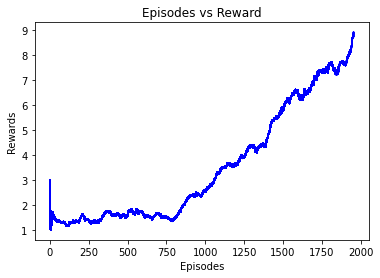

In [ ]:
rewards, episodes = [], []
best_eval_reward = 0
for e in range(EPISODES):
    done = False
    score = 0

    history = np.zeros([5, 84, 84], dtype=np.uint8)
    step = 0
    d = False
    state = env.reset()
    next_state = state
    life = number_lives

    get_init_state(history, state)

    while not done:
        step += 1
        frame += 1

        # Perform a fire action if ball is no longer on screen to continue onto next life
        if step > 1 and len(np.unique(next_state[:189] == state[:189])) < 2:
            action = 0
        else:
            action = agent.get_action(np.float32(history[:4, :, :]) / 255.)
        state = next_state
        next_state, reward, done, info = env.step(action + 1)
        
        frame_next_state = get_frame(next_state)
        history[4, :, :] = frame_next_state
        terminal_state = check_live(life, info['ale.lives'])

        life = info['ale.lives']
        r = np.clip(reward, -1, 1) 
        r = reward

        # Store the transition in memory 
        agent.memory.push(deepcopy(frame_next_state), action, r, terminal_state)
        # Start training after random sample generation
        if(frame >= train_frame):
            agent.train_policy_net(frame)
            # Update the target network only for Double DQN only
            if double_dqn and (frame % update_target_network_frequency)== 0:
                agent.update_target_net()
        score += reward
        history[:4, :, :] = history[1:, :, :]
            
        if done:
            evaluation_reward.append(score)
            rewards.append(np.mean(evaluation_reward))
            episodes.append(e)
            pylab.plot(episodes, rewards, 'b')
            pylab.xlabel('Episodes')
            pylab.ylabel('Rewards') 
            pylab.title('Episodes vs Reward')
            pylab.savefig("./save_graph/breakout_dqn.png") # save graph for training visualization
            
            # every episode, plot the play time
            print("episode:", e, "  score:", score, "  memory length:",
                  len(agent.memory), "  epsilon:", agent.epsilon, "   steps:", step,
                  "   lr:", agent.optimizer.param_groups[0]['lr'], "    evaluation reward:", np.mean(evaluation_reward))

            # if the mean of scores of last 100 episode is bigger than 5 save model
            ### Change this save condition to whatever you prefer ###
            if np.mean(evaluation_reward) > 5 and np.mean(evaluation_reward) > best_eval_reward:
                torch.save(agent.policy_net, "./save_model/breakout_dqn.pth")
                best_eval_reward = np.mean(evaluation_reward)


# Visualize Agent Performance

BE AWARE THIS CODE BELOW MAY CRASH THE KERNEL IF YOU RUN THE SAME CELL TWICE.

Please save your model before running this portion of the code.

In [ ]:
torch.save(agent.policy_net, "./save_model/breakout_dqn_latest.pth")

In [8]:
from gym.wrappers import Monitor
import glob
import io
import base64

from IPython.display import HTML
from IPython import display as ipythondisplay

from pyvirtualdisplay import Display

# Displaying the game live
def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("%s | Step: %d %s" % ("Agent Playing",step, info))
    plt.axis('off')

    ipythondisplay.clear_output(wait=True)
    ipythondisplay.display(plt.gcf())
    
# Recording the game and replaying the game afterwards
def show_video():
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = mp4list[0]
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else: 
        print("Could not find video")
    

def wrap_env(env):
    env = Monitor(env, './video', force=True)
    return env

In [9]:
display = Display(visible=0, size=(300, 200))
display.start()

# Load agent
agent.load_policy_net("./save_model/breakout_dqn_latest.pth")
agent.epsilon = 0.0 # Set agent to only exploit the best action

env = gym.make('BreakoutDeterministic-v4')
env = wrap_env(env)

done = False
score = 0
step = 0
state = env.reset()
next_state = state
life = number_lives
history = np.zeros([5, 84, 84], dtype=np.uint8)
get_init_state(history, state)

while not done:
    
    # Render breakout
    env.render()
#     show_state(env,step) # uncommenting this provides another way to visualize the game

    step += 1
    frame += 1

    # Perform a fire action if ball is no longer on screen
    if step > 1 and len(np.unique(next_state[:189] == state[:189])) < 2:
        action = 0
    else:
        action = agent.get_action(np.float32(history[:4, :, :]) / 255.)
    state = next_state
    
    next_state, reward, done, info = env.step(action + 1)
        
    frame_next_state = get_frame(next_state)
    history[4, :, :] = frame_next_state
    terminal_state = check_live(life, info['ale.lives'])
        
    life = info['ale.lives']
    r = np.clip(reward, -1, 1) 
    r = reward

    # Store the transition in memory 
    agent.memory.push(deepcopy(frame_next_state), action, r, terminal_state)
    # Start training after random sample generation
    score += reward
    
    history[:4, :, :] = history[1:, :, :]
env.close()
show_video()
display.stop()

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'torch.nn.modules.conv.Conv2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'torch.nn.modules.batchnorm.BatchNorm2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:658: SourceChangeWarning: source code of class 'torch.nn.modules.linear.Linear' has changed. you can retrieve the original source code by accessing the object's source attribute or set `

# DQN

In [ ]:
double_dqn = False # set to True if using double DQN agent

if double_dqn:
    from agent_double import Agent
else:
    from agent import Agent

agent = Agent(action_size)
evaluation_reward = deque(maxlen=evaluation_reward_length)
frame = 0
memory_size = 0

episode: 0   score: 2.0   memory length: 198   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 2.0
episode: 1   score: 1.0   memory length: 367   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.5
episode: 2   score: 2.0   memory length: 585   epsilon: 1.0    steps: 218    lr: 0.0001     evaluation reward: 1.6666666666666667
episode: 3   score: 2.0   memory length: 783   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 1.75
episode: 4   score: 1.0   memory length: 951   epsilon: 1.0    steps: 168    lr: 0.0001     evaluation reward: 1.6
episode: 5   score: 0.0   memory length: 1074   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.3333333333333333
episode: 6   score: 1.0   memory length: 1225   epsilon: 1.0    steps: 151    lr: 0.0001     evaluation reward: 1.2857142857142858
episode: 7   score: 3.0   memory length: 1453   epsilon: 1.0    steps: 228    lr: 0.0001     evaluation reward: 1.5
episode: 8   score: 0.0   memor

episode: 65   score: 1.0   memory length: 10654   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 0.9696969696969697
episode: 66   score: 1.0   memory length: 10805   epsilon: 1.0    steps: 151    lr: 0.0001     evaluation reward: 0.9701492537313433
episode: 67   score: 1.0   memory length: 10956   epsilon: 1.0    steps: 151    lr: 0.0001     evaluation reward: 0.9705882352941176
episode: 68   score: 1.0   memory length: 11106   epsilon: 1.0    steps: 150    lr: 0.0001     evaluation reward: 0.9710144927536232
episode: 69   score: 2.0   memory length: 11303   epsilon: 1.0    steps: 197    lr: 0.0001     evaluation reward: 0.9857142857142858
episode: 70   score: 3.0   memory length: 11529   epsilon: 1.0    steps: 226    lr: 0.0001     evaluation reward: 1.0140845070422535
episode: 71   score: 0.0   memory length: 11652   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.0
episode: 72   score: 2.0   memory length: 11870   epsilon: 1.0    steps: 218    lr: 

episode: 131   score: 2.0   memory length: 22869   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 1.34
episode: 132   score: 2.0   memory length: 23049   epsilon: 1.0    steps: 180    lr: 0.0001     evaluation reward: 1.36
episode: 133   score: 0.0   memory length: 23172   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.34
episode: 134   score: 2.0   memory length: 23369   epsilon: 1.0    steps: 197    lr: 0.0001     evaluation reward: 1.36
episode: 135   score: 0.0   memory length: 23492   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.34
episode: 136   score: 3.0   memory length: 23736   epsilon: 1.0    steps: 244    lr: 0.0001     evaluation reward: 1.37
episode: 137   score: 2.0   memory length: 23936   epsilon: 1.0    steps: 200    lr: 0.0001     evaluation reward: 1.39
episode: 138   score: 1.0   memory length: 24104   epsilon: 1.0    steps: 168    lr: 0.0001     evaluation reward: 1.38
episode: 139   score: 2.0   memory lengt

episode: 200   score: 2.0   memory length: 35196   epsilon: 1.0    steps: 215    lr: 0.0001     evaluation reward: 1.52
episode: 201   score: 0.0   memory length: 35319   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.51
episode: 202   score: 1.0   memory length: 35488   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.5
episode: 203   score: 1.0   memory length: 35639   epsilon: 1.0    steps: 151    lr: 0.0001     evaluation reward: 1.5
episode: 204   score: 1.0   memory length: 35809   epsilon: 1.0    steps: 170    lr: 0.0001     evaluation reward: 1.48
episode: 205   score: 2.0   memory length: 36006   epsilon: 1.0    steps: 197    lr: 0.0001     evaluation reward: 1.5
episode: 206   score: 0.0   memory length: 36128   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.48
episode: 207   score: 0.0   memory length: 36250   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.48
episode: 208   score: 1.0   memory length: 

episode: 269   score: 0.0   memory length: 47839   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.38
episode: 270   score: 3.0   memory length: 48103   epsilon: 1.0    steps: 264    lr: 0.0001     evaluation reward: 1.41
episode: 271   score: 0.0   memory length: 48226   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.4
episode: 272   score: 2.0   memory length: 48444   epsilon: 1.0    steps: 218    lr: 0.0001     evaluation reward: 1.4
episode: 273   score: 3.0   memory length: 48714   epsilon: 1.0    steps: 270    lr: 0.0001     evaluation reward: 1.41
episode: 274   score: 0.0   memory length: 48837   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.39
episode: 275   score: 4.0   memory length: 49123   epsilon: 1.0    steps: 286    lr: 0.0001     evaluation reward: 1.42
episode: 276   score: 0.0   memory length: 49245   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.4
episode: 277   score: 2.0   memory length: 

episode: 338   score: 2.0   memory length: 60223   epsilon: 1.0    steps: 218    lr: 0.0001     evaluation reward: 1.53
episode: 339   score: 2.0   memory length: 60441   epsilon: 1.0    steps: 218    lr: 0.0001     evaluation reward: 1.54
episode: 340   score: 2.0   memory length: 60664   epsilon: 1.0    steps: 223    lr: 0.0001     evaluation reward: 1.56
episode: 341   score: 0.0   memory length: 60787   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.55
episode: 342   score: 2.0   memory length: 60988   epsilon: 1.0    steps: 201    lr: 0.0001     evaluation reward: 1.54
episode: 343   score: 0.0   memory length: 61111   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.52
episode: 344   score: 0.0   memory length: 61233   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.51
episode: 345   score: 4.0   memory length: 61507   epsilon: 1.0    steps: 274    lr: 0.0001     evaluation reward: 1.53
episode: 346   score: 4.0   memory lengt

episode: 407   score: 2.0   memory length: 73365   epsilon: 1.0    steps: 217    lr: 0.0001     evaluation reward: 1.6
episode: 408   score: 1.0   memory length: 73537   epsilon: 1.0    steps: 172    lr: 0.0001     evaluation reward: 1.61
episode: 409   score: 0.0   memory length: 73659   epsilon: 1.0    steps: 122    lr: 0.0001     evaluation reward: 1.58
episode: 410   score: 4.0   memory length: 73935   epsilon: 1.0    steps: 276    lr: 0.0001     evaluation reward: 1.61
episode: 411   score: 1.0   memory length: 74086   epsilon: 1.0    steps: 151    lr: 0.0001     evaluation reward: 1.62
episode: 412   score: 0.0   memory length: 74209   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.62
episode: 413   score: 1.0   memory length: 74378   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.62
episode: 414   score: 0.0   memory length: 74501   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.61
episode: 415   score: 3.0   memory length

episode: 476   score: 1.0   memory length: 86199   epsilon: 1.0    steps: 153    lr: 0.0001     evaluation reward: 1.56
episode: 477   score: 1.0   memory length: 86371   epsilon: 1.0    steps: 172    lr: 0.0001     evaluation reward: 1.54
episode: 478   score: 2.0   memory length: 86568   epsilon: 1.0    steps: 197    lr: 0.0001     evaluation reward: 1.56
episode: 479   score: 0.0   memory length: 86691   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.53
episode: 480   score: 1.0   memory length: 86842   epsilon: 1.0    steps: 151    lr: 0.0001     evaluation reward: 1.53
episode: 481   score: 0.0   memory length: 86965   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.51
episode: 482   score: 3.0   memory length: 87190   epsilon: 1.0    steps: 225    lr: 0.0001     evaluation reward: 1.52
episode: 483   score: 0.0   memory length: 87313   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.52
episode: 484   score: 0.0   memory lengt

episode: 545   score: 3.0   memory length: 97851   epsilon: 1.0    steps: 244    lr: 0.0001     evaluation reward: 1.33
episode: 546   score: 0.0   memory length: 97974   epsilon: 1.0    steps: 123    lr: 0.0001     evaluation reward: 1.3
episode: 547   score: 1.0   memory length: 98144   epsilon: 1.0    steps: 170    lr: 0.0001     evaluation reward: 1.3
episode: 548   score: 2.0   memory length: 98342   epsilon: 1.0    steps: 198    lr: 0.0001     evaluation reward: 1.28
episode: 549   score: 1.0   memory length: 98510   epsilon: 1.0    steps: 168    lr: 0.0001     evaluation reward: 1.29
episode: 550   score: 1.0   memory length: 98679   epsilon: 1.0    steps: 169    lr: 0.0001     evaluation reward: 1.3
episode: 551   score: 3.0   memory length: 98925   epsilon: 1.0    steps: 246    lr: 0.0001     evaluation reward: 1.32
episode: 552   score: 1.0   memory length: 99095   epsilon: 1.0    steps: 170    lr: 0.0001     evaluation reward: 1.31
episode: 553   score: 12.0   memory length:

episode: 607   score: 3.0   memory length: 109029   epsilon: 0.9821206000003881    steps: 244    lr: 0.0001     evaluation reward: 1.42
episode: 608   score: 2.0   memory length: 109226   epsilon: 0.9817305400003966    steps: 197    lr: 0.0001     evaluation reward: 1.41
episode: 609   score: 1.0   memory length: 109396   epsilon: 0.9813939400004039    steps: 170    lr: 0.0001     evaluation reward: 1.42
episode: 610   score: 3.0   memory length: 109665   epsilon: 0.9808613200004155    steps: 269    lr: 0.0001     evaluation reward: 1.43
episode: 611   score: 1.0   memory length: 109834   epsilon: 0.9805267000004227    steps: 169    lr: 0.0001     evaluation reward: 1.44
episode: 612   score: 3.0   memory length: 110063   epsilon: 0.9800732800004326    steps: 229    lr: 0.0001     evaluation reward: 1.47
episode: 613   score: 1.0   memory length: 110234   epsilon: 0.9797347000004399    steps: 171    lr: 0.0001     evaluation reward: 1.46
episode: 614   score: 0.0   memory length: 11035

episode: 668   score: 1.0   memory length: 120257   epsilon: 0.9598891600008708    steps: 151    lr: 0.0001     evaluation reward: 1.4
episode: 669   score: 1.0   memory length: 120426   epsilon: 0.959554540000878    steps: 169    lr: 0.0001     evaluation reward: 1.39
episode: 670   score: 1.0   memory length: 120596   epsilon: 0.9592179400008853    steps: 170    lr: 0.0001     evaluation reward: 1.38
episode: 671   score: 2.0   memory length: 120816   epsilon: 0.9587823400008948    steps: 220    lr: 0.0001     evaluation reward: 1.4
episode: 672   score: 0.0   memory length: 120939   epsilon: 0.9585388000009001    steps: 123    lr: 0.0001     evaluation reward: 1.4
episode: 673   score: 0.0   memory length: 121062   epsilon: 0.9582952600009054    steps: 123    lr: 0.0001     evaluation reward: 1.4
episode: 674   score: 3.0   memory length: 121308   epsilon: 0.9578081800009159    steps: 246    lr: 0.0001     evaluation reward: 1.43
episode: 675   score: 1.0   memory length: 121459   e

episode: 729   score: 4.0   memory length: 131291   epsilon: 0.938041840001345    steps: 278    lr: 0.0001     evaluation reward: 1.42
episode: 730   score: 1.0   memory length: 131461   epsilon: 0.9377052400013524    steps: 170    lr: 0.0001     evaluation reward: 1.41
episode: 731   score: 2.0   memory length: 131658   epsilon: 0.9373151800013608    steps: 197    lr: 0.0001     evaluation reward: 1.4
episode: 732   score: 4.0   memory length: 131958   epsilon: 0.9367211800013737    steps: 300    lr: 0.0001     evaluation reward: 1.4
episode: 733   score: 1.0   memory length: 132128   epsilon: 0.936384580001381    steps: 170    lr: 0.0001     evaluation reward: 1.41
episode: 734   score: 2.0   memory length: 132326   epsilon: 0.9359925400013895    steps: 198    lr: 0.0001     evaluation reward: 1.41
episode: 735   score: 1.0   memory length: 132476   epsilon: 0.935695540001396    steps: 150    lr: 0.0001     evaluation reward: 1.42
episode: 736   score: 0.0   memory length: 132598   e

episode: 790   score: 3.0   memory length: 142511   epsilon: 0.9158262400018273    steps: 227    lr: 0.0001     evaluation reward: 1.5
episode: 791   score: 1.0   memory length: 142683   epsilon: 0.9154856800018347    steps: 172    lr: 0.0001     evaluation reward: 1.49
episode: 792   score: 1.0   memory length: 142852   epsilon: 0.915151060001842    steps: 169    lr: 0.0001     evaluation reward: 1.48
episode: 793   score: 0.0   memory length: 142975   epsilon: 0.9149075200018473    steps: 123    lr: 0.0001     evaluation reward: 1.48
episode: 794   score: 1.0   memory length: 143144   epsilon: 0.9145729000018545    steps: 169    lr: 0.0001     evaluation reward: 1.49
episode: 795   score: 0.0   memory length: 143267   epsilon: 0.9143293600018598    steps: 123    lr: 0.0001     evaluation reward: 1.47
episode: 796   score: 3.0   memory length: 143536   epsilon: 0.9137967400018714    steps: 269    lr: 0.0001     evaluation reward: 1.49
episode: 797   score: 0.0   memory length: 143659 

episode: 851   score: 3.0   memory length: 153369   epsilon: 0.894327400002294    steps: 268    lr: 0.0001     evaluation reward: 1.4
episode: 852   score: 1.0   memory length: 153520   epsilon: 0.8940284200023005    steps: 151    lr: 0.0001     evaluation reward: 1.4
episode: 853   score: 0.0   memory length: 153642   epsilon: 0.8937868600023058    steps: 122    lr: 0.0001     evaluation reward: 1.4
episode: 854   score: 0.0   memory length: 153765   epsilon: 0.8935433200023111    steps: 123    lr: 0.0001     evaluation reward: 1.39
episode: 855   score: 0.0   memory length: 153888   epsilon: 0.8932997800023164    steps: 123    lr: 0.0001     evaluation reward: 1.38
episode: 856   score: 1.0   memory length: 154039   epsilon: 0.8930008000023228    steps: 151    lr: 0.0001     evaluation reward: 1.38
episode: 857   score: 1.0   memory length: 154207   epsilon: 0.8926681600023301    steps: 168    lr: 0.0001     evaluation reward: 1.39
episode: 858   score: 2.0   memory length: 154425   

episode: 912   score: 3.0   memory length: 163919   epsilon: 0.8734384000027475    steps: 246    lr: 0.0001     evaluation reward: 1.28
episode: 913   score: 2.0   memory length: 164137   epsilon: 0.8730067600027569    steps: 218    lr: 0.0001     evaluation reward: 1.29
episode: 914   score: 1.0   memory length: 164305   epsilon: 0.8726741200027641    steps: 168    lr: 0.0001     evaluation reward: 1.3
episode: 915   score: 2.0   memory length: 164523   epsilon: 0.8722424800027735    steps: 218    lr: 0.0001     evaluation reward: 1.32
episode: 916   score: 0.0   memory length: 164646   epsilon: 0.8719989400027788    steps: 123    lr: 0.0001     evaluation reward: 1.32
episode: 917   score: 1.0   memory length: 164797   epsilon: 0.8716999600027853    steps: 151    lr: 0.0001     evaluation reward: 1.33
episode: 918   score: 1.0   memory length: 164948   epsilon: 0.8714009800027918    steps: 151    lr: 0.0001     evaluation reward: 1.33
episode: 919   score: 3.0   memory length: 165193

episode: 973   score: 1.0   memory length: 175074   epsilon: 0.851351500003227    steps: 151    lr: 0.0001     evaluation reward: 1.33
episode: 974   score: 1.0   memory length: 175244   epsilon: 0.8510149000032343    steps: 170    lr: 0.0001     evaluation reward: 1.33
episode: 975   score: 3.0   memory length: 175490   epsilon: 0.8505278200032449    steps: 246    lr: 0.0001     evaluation reward: 1.32
episode: 976   score: 1.0   memory length: 175641   epsilon: 0.8502288400032514    steps: 151    lr: 0.0001     evaluation reward: 1.31
episode: 977   score: 1.0   memory length: 175810   epsilon: 0.8498942200032586    steps: 169    lr: 0.0001     evaluation reward: 1.32
episode: 978   score: 0.0   memory length: 175933   epsilon: 0.8496506800032639    steps: 123    lr: 0.0001     evaluation reward: 1.3
episode: 979   score: 2.0   memory length: 176151   epsilon: 0.8492190400032733    steps: 218    lr: 0.0001     evaluation reward: 1.32
episode: 980   score: 0.0   memory length: 176273 

episode: 1034   score: 2.0   memory length: 185972   epsilon: 0.8297734600036955    steps: 198    lr: 0.0001     evaluation reward: 1.41
episode: 1035   score: 2.0   memory length: 186174   epsilon: 0.8293735000037041    steps: 202    lr: 0.0001     evaluation reward: 1.41
episode: 1036   score: 1.0   memory length: 186324   epsilon: 0.8290765000037106    steps: 150    lr: 0.0001     evaluation reward: 1.4
episode: 1037   score: 1.0   memory length: 186492   epsilon: 0.8287438600037178    steps: 168    lr: 0.0001     evaluation reward: 1.41
episode: 1038   score: 2.0   memory length: 186692   epsilon: 0.8283478600037264    steps: 200    lr: 0.0001     evaluation reward: 1.41
episode: 1039   score: 1.0   memory length: 186843   epsilon: 0.8280488800037329    steps: 151    lr: 0.0001     evaluation reward: 1.42
episode: 1040   score: 0.0   memory length: 186966   epsilon: 0.8278053400037382    steps: 123    lr: 0.0001     evaluation reward: 1.41
episode: 1041   score: 0.0   memory length

episode: 1094   score: 4.0   memory length: 196403   epsilon: 0.8091200800041438    steps: 297    lr: 0.0001     evaluation reward: 1.35
episode: 1095   score: 3.0   memory length: 196648   epsilon: 0.8086349800041543    steps: 245    lr: 0.0001     evaluation reward: 1.37
episode: 1096   score: 5.0   memory length: 196969   epsilon: 0.8079994000041681    steps: 321    lr: 0.0001     evaluation reward: 1.4
episode: 1097   score: 2.0   memory length: 197186   epsilon: 0.8075697400041775    steps: 217    lr: 0.0001     evaluation reward: 1.41
episode: 1098   score: 0.0   memory length: 197309   epsilon: 0.8073262000041828    steps: 123    lr: 0.0001     evaluation reward: 1.39
episode: 1099   score: 2.0   memory length: 197526   epsilon: 0.8068965400041921    steps: 217    lr: 0.0001     evaluation reward: 1.4
episode: 1100   score: 2.0   memory length: 197724   epsilon: 0.8065045000042006    steps: 198    lr: 0.0001     evaluation reward: 1.41
episode: 1101   score: 2.0   memory length:

episode: 1155   score: 2.0   memory length: 208781   epsilon: 0.7846116400046759    steps: 197    lr: 4e-05     evaluation reward: 1.74
episode: 1156   score: 1.0   memory length: 208931   epsilon: 0.7843146400046823    steps: 150    lr: 4e-05     evaluation reward: 1.75
episode: 1157   score: 1.0   memory length: 209082   epsilon: 0.7840156600046888    steps: 151    lr: 4e-05     evaluation reward: 1.74
episode: 1158   score: 1.0   memory length: 209233   epsilon: 0.7837166800046953    steps: 151    lr: 4e-05     evaluation reward: 1.73
episode: 1159   score: 2.0   memory length: 209430   epsilon: 0.7833266200047038    steps: 197    lr: 4e-05     evaluation reward: 1.75
episode: 1160   score: 1.0   memory length: 209581   epsilon: 0.7830276400047103    steps: 151    lr: 4e-05     evaluation reward: 1.74
episode: 1161   score: 4.0   memory length: 209877   epsilon: 0.782441560004723    steps: 296    lr: 4e-05     evaluation reward: 1.76
episode: 1162   score: 1.0   memory length: 21004

episode: 1216   score: 1.0   memory length: 220655   epsilon: 0.7611011200051863    steps: 172    lr: 4e-05     evaluation reward: 1.96
episode: 1217   score: 3.0   memory length: 220902   epsilon: 0.7606120600051969    steps: 247    lr: 4e-05     evaluation reward: 1.95
episode: 1218   score: 3.0   memory length: 221111   epsilon: 0.7601982400052059    steps: 209    lr: 4e-05     evaluation reward: 1.96
episode: 1219   score: 0.0   memory length: 221234   epsilon: 0.7599547000052111    steps: 123    lr: 4e-05     evaluation reward: 1.95
episode: 1220   score: 2.0   memory length: 221431   epsilon: 0.7595646400052196    steps: 197    lr: 4e-05     evaluation reward: 1.96
episode: 1221   score: 3.0   memory length: 221678   epsilon: 0.7590755800052302    steps: 247    lr: 4e-05     evaluation reward: 1.97
episode: 1222   score: 1.0   memory length: 221828   epsilon: 0.7587785800052367    steps: 150    lr: 4e-05     evaluation reward: 1.94
episode: 1223   score: 0.0   memory length: 2219

episode: 1277   score: 0.0   memory length: 233975   epsilon: 0.7347275200057588    steps: 123    lr: 4e-05     evaluation reward: 2.29
episode: 1278   score: 1.0   memory length: 234145   epsilon: 0.7343909200057661    steps: 170    lr: 4e-05     evaluation reward: 2.28
episode: 1279   score: 0.0   memory length: 234268   epsilon: 0.7341473800057714    steps: 123    lr: 4e-05     evaluation reward: 2.25
episode: 1280   score: 2.0   memory length: 234484   epsilon: 0.7337197000057807    steps: 216    lr: 4e-05     evaluation reward: 2.23
episode: 1281   score: 6.0   memory length: 234880   epsilon: 0.7329356200057977    steps: 396    lr: 4e-05     evaluation reward: 2.27
episode: 1282   score: 3.0   memory length: 235106   epsilon: 0.7324881400058074    steps: 226    lr: 4e-05     evaluation reward: 2.28
episode: 1283   score: 2.0   memory length: 235303   epsilon: 0.7320980800058159    steps: 197    lr: 4e-05     evaluation reward: 2.27
episode: 1284   score: 3.0   memory length: 2355

episode: 1338   score: 3.0   memory length: 247952   epsilon: 0.7070530600063596    steps: 226    lr: 4e-05     evaluation reward: 2.6
episode: 1339   score: 2.0   memory length: 248171   epsilon: 0.706619440006369    steps: 219    lr: 4e-05     evaluation reward: 2.6
episode: 1340   score: 4.0   memory length: 248488   epsilon: 0.7059917800063826    steps: 317    lr: 4e-05     evaluation reward: 2.61
episode: 1341   score: 0.0   memory length: 248610   epsilon: 0.7057502200063879    steps: 122    lr: 4e-05     evaluation reward: 2.6
episode: 1342   score: 7.0   memory length: 249014   epsilon: 0.7049503000064052    steps: 404    lr: 4e-05     evaluation reward: 2.64
episode: 1343   score: 3.0   memory length: 249259   epsilon: 0.7044652000064158    steps: 245    lr: 4e-05     evaluation reward: 2.65
episode: 1344   score: 3.0   memory length: 249485   epsilon: 0.7040177200064255    steps: 226    lr: 4e-05     evaluation reward: 2.65
episode: 1345   score: 3.0   memory length: 249711  

episode: 1399   score: 4.0   memory length: 262816   epsilon: 0.6776223400069985    steps: 297    lr: 4e-05     evaluation reward: 2.88
episode: 1400   score: 6.0   memory length: 263160   epsilon: 0.6769412200070133    steps: 344    lr: 4e-05     evaluation reward: 2.93
episode: 1401   score: 4.0   memory length: 263436   epsilon: 0.6763947400070252    steps: 276    lr: 4e-05     evaluation reward: 2.94
episode: 1402   score: 6.0   memory length: 263742   epsilon: 0.6757888600070383    steps: 306    lr: 4e-05     evaluation reward: 2.97
episode: 1403   score: 2.0   memory length: 263940   epsilon: 0.6753968200070468    steps: 198    lr: 4e-05     evaluation reward: 2.97
episode: 1404   score: 4.0   memory length: 264241   epsilon: 0.6748008400070598    steps: 301    lr: 4e-05     evaluation reward: 2.98
episode: 1405   score: 3.0   memory length: 264486   epsilon: 0.6743157400070703    steps: 245    lr: 4e-05     evaluation reward: 2.98
episode: 1406   score: 4.0   memory length: 2648

episode: 1460   score: 9.0   memory length: 277968   epsilon: 0.6476213800076498    steps: 365    lr: 4e-05     evaluation reward: 3.33
episode: 1461   score: 2.0   memory length: 278150   epsilon: 0.6472610200076576    steps: 182    lr: 4e-05     evaluation reward: 3.32
episode: 1462   score: 1.0   memory length: 278302   epsilon: 0.6469600600076642    steps: 152    lr: 4e-05     evaluation reward: 3.28
episode: 1463   score: 3.0   memory length: 278548   epsilon: 0.6464729800076747    steps: 246    lr: 4e-05     evaluation reward: 3.25
episode: 1464   score: 2.0   memory length: 278746   epsilon: 0.6460809400076832    steps: 198    lr: 4e-05     evaluation reward: 3.23
episode: 1465   score: 4.0   memory length: 279042   epsilon: 0.645494860007696    steps: 296    lr: 4e-05     evaluation reward: 3.24
episode: 1466   score: 6.0   memory length: 279433   epsilon: 0.6447206800077128    steps: 391    lr: 4e-05     evaluation reward: 3.27
episode: 1467   score: 3.0   memory length: 27966

episode: 1521   score: 3.0   memory length: 293551   epsilon: 0.6167670400083196    steps: 231    lr: 4e-05     evaluation reward: 3.3
episode: 1522   score: 2.0   memory length: 293749   epsilon: 0.6163750000083281    steps: 198    lr: 4e-05     evaluation reward: 3.29
episode: 1523   score: 3.0   memory length: 293977   epsilon: 0.6159235600083379    steps: 228    lr: 4e-05     evaluation reward: 3.29
episode: 1524   score: 4.0   memory length: 294253   epsilon: 0.6153770800083498    steps: 276    lr: 4e-05     evaluation reward: 3.3
episode: 1525   score: 2.0   memory length: 294434   epsilon: 0.6150187000083576    steps: 181    lr: 4e-05     evaluation reward: 3.28
episode: 1526   score: 3.0   memory length: 294702   epsilon: 0.6144880600083691    steps: 268    lr: 4e-05     evaluation reward: 3.28
episode: 1527   score: 4.0   memory length: 294941   epsilon: 0.6140148400083794    steps: 239    lr: 4e-05     evaluation reward: 3.3
episode: 1528   score: 4.0   memory length: 295236 

episode: 1578   score: 4.0   memory length: 309461   epsilon: 0.5852652400090035    steps: 254    lr: 1.6000000000000003e-05     evaluation reward: 3.78
episode: 1579   score: 4.0   memory length: 309743   epsilon: 0.5847068800090156    steps: 282    lr: 1.6000000000000003e-05     evaluation reward: 3.78
episode: 1580   score: 7.0   memory length: 310164   epsilon: 0.5838733000090337    steps: 421    lr: 1.6000000000000003e-05     evaluation reward: 3.81
episode: 1581   score: 5.0   memory length: 310454   epsilon: 0.5832991000090462    steps: 290    lr: 1.6000000000000003e-05     evaluation reward: 3.83
episode: 1582   score: 3.0   memory length: 310681   epsilon: 0.5828496400090559    steps: 227    lr: 1.6000000000000003e-05     evaluation reward: 3.78
episode: 1583   score: 6.0   memory length: 311071   epsilon: 0.5820774400090727    steps: 390    lr: 1.6000000000000003e-05     evaluation reward: 3.82
episode: 1584   score: 3.0   memory length: 311302   epsilon: 0.5816200600090826  

episode: 1632   score: 3.0   memory length: 324941   epsilon: 0.5546148400096689    steps: 225    lr: 1.6000000000000003e-05     evaluation reward: 4.25
episode: 1633   score: 4.0   memory length: 325220   epsilon: 0.5540624200096809    steps: 279    lr: 1.6000000000000003e-05     evaluation reward: 4.27
episode: 1634   score: 3.0   memory length: 325449   epsilon: 0.5536090000096907    steps: 229    lr: 1.6000000000000003e-05     evaluation reward: 4.27
episode: 1635   score: 4.0   memory length: 325724   epsilon: 0.5530645000097025    steps: 275    lr: 1.6000000000000003e-05     evaluation reward: 4.28
episode: 1636   score: 8.0   memory length: 326165   epsilon: 0.5521913200097215    steps: 441    lr: 1.6000000000000003e-05     evaluation reward: 4.34
episode: 1637   score: 3.0   memory length: 326390   epsilon: 0.5517458200097312    steps: 225    lr: 1.6000000000000003e-05     evaluation reward: 4.28
episode: 1638   score: 3.0   memory length: 326599   epsilon: 0.5513320000097401  

episode: 1686   score: 7.0   memory length: 340558   epsilon: 0.5236931800103402    steps: 390    lr: 1.6000000000000003e-05     evaluation reward: 4.27
episode: 1687   score: 5.0   memory length: 340867   epsilon: 0.5230813600103534    steps: 309    lr: 1.6000000000000003e-05     evaluation reward: 4.24
episode: 1688   score: 7.0   memory length: 341291   epsilon: 0.5222418400103717    steps: 424    lr: 1.6000000000000003e-05     evaluation reward: 4.25
episode: 1689   score: 4.0   memory length: 341531   epsilon: 0.521766640010382    steps: 240    lr: 1.6000000000000003e-05     evaluation reward: 4.26
episode: 1690   score: 3.0   memory length: 341781   epsilon: 0.5212716400103927    steps: 250    lr: 1.6000000000000003e-05     evaluation reward: 4.24
episode: 1691   score: 4.0   memory length: 342042   epsilon: 0.5207548600104039    steps: 261    lr: 1.6000000000000003e-05     evaluation reward: 4.23
episode: 1692   score: 7.0   memory length: 342463   epsilon: 0.519921280010422    

episode: 1740   score: 6.0   memory length: 357420   epsilon: 0.49030642001079316    steps: 365    lr: 1.6000000000000003e-05     evaluation reward: 4.75
episode: 1741   score: 4.0   memory length: 357700   epsilon: 0.48975202001078966    steps: 280    lr: 1.6000000000000003e-05     evaluation reward: 4.73
episode: 1742   score: 4.0   memory length: 357975   epsilon: 0.4892075200107862    steps: 275    lr: 1.6000000000000003e-05     evaluation reward: 4.72
episode: 1743   score: 4.0   memory length: 358253   epsilon: 0.48865708001078273    steps: 278    lr: 1.6000000000000003e-05     evaluation reward: 4.72
episode: 1744   score: 8.0   memory length: 358686   epsilon: 0.4877997400107773    steps: 433    lr: 1.6000000000000003e-05     evaluation reward: 4.76
episode: 1745   score: 3.0   memory length: 358932   epsilon: 0.4873126600107742    steps: 246    lr: 1.6000000000000003e-05     evaluation reward: 4.75
episode: 1746   score: 9.0   memory length: 359421   epsilon: 0.486344440010768

episode: 1794   score: 11.0   memory length: 375818   epsilon: 0.4538783800105627    steps: 439    lr: 1.6000000000000003e-05     evaluation reward: 5.39
episode: 1795   score: 7.0   memory length: 376242   epsilon: 0.4530388600105574    steps: 424    lr: 1.6000000000000003e-05     evaluation reward: 5.4
episode: 1796   score: 6.0   memory length: 376597   epsilon: 0.45233596001055293    steps: 355    lr: 1.6000000000000003e-05     evaluation reward: 5.39
episode: 1797   score: 3.0   memory length: 376806   epsilon: 0.4519221400105503    steps: 209    lr: 1.6000000000000003e-05     evaluation reward: 5.36
episode: 1798   score: 8.0   memory length: 377229   epsilon: 0.451084600010545    steps: 423    lr: 1.6000000000000003e-05     evaluation reward: 5.4
episode: 1799   score: 5.0   memory length: 377538   epsilon: 0.45047278001054114    steps: 309    lr: 1.6000000000000003e-05     evaluation reward: 5.37
episode: 1800   score: 6.0   memory length: 377909   epsilon: 0.4497382000105365  

episode: 1848   score: 7.0   memory length: 394418   epsilon: 0.4170503800103297    steps: 385    lr: 1.6000000000000003e-05     evaluation reward: 5.8
episode: 1849   score: 4.0   memory length: 394677   epsilon: 0.41653756001032644    steps: 259    lr: 1.6000000000000003e-05     evaluation reward: 5.78
episode: 1850   score: 4.0   memory length: 394936   epsilon: 0.4160247400103232    steps: 259    lr: 1.6000000000000003e-05     evaluation reward: 5.8
episode: 1851   score: 4.0   memory length: 395198   epsilon: 0.4155059800103199    steps: 262    lr: 1.6000000000000003e-05     evaluation reward: 5.79
episode: 1852   score: 2.0   memory length: 395380   epsilon: 0.41514562001031763    steps: 182    lr: 1.6000000000000003e-05     evaluation reward: 5.75
episode: 1853   score: 4.0   memory length: 395637   epsilon: 0.4146367600103144    steps: 257    lr: 1.6000000000000003e-05     evaluation reward: 5.65
episode: 1854   score: 4.0   memory length: 395894   epsilon: 0.4141279000103112  

episode: 1902   score: 4.0   memory length: 414203   epsilon: 0.3778760800100818    steps: 261    lr: 6.400000000000001e-06     evaluation reward: 6.09
episode: 1903   score: 6.0   memory length: 414598   epsilon: 0.3770939800100769    steps: 395    lr: 6.400000000000001e-06     evaluation reward: 6.1
episode: 1904   score: 6.0   memory length: 414972   epsilon: 0.3763534600100722    steps: 374    lr: 6.400000000000001e-06     evaluation reward: 6.09
episode: 1905   score: 4.0   memory length: 415265   epsilon: 0.3757733200100685    steps: 293    lr: 6.400000000000001e-06     evaluation reward: 6.06
episode: 1906   score: 8.0   memory length: 415751   epsilon: 0.37481104001006244    steps: 486    lr: 6.400000000000001e-06     evaluation reward: 6.06
episode: 1907   score: 9.0   memory length: 416210   epsilon: 0.3739022200100567    steps: 459    lr: 6.400000000000001e-06     evaluation reward: 6.11
episode: 1908   score: 7.0   memory length: 416593   epsilon: 0.3731438800100519    step

episode: 1956   score: 6.0   memory length: 434757   epsilon: 0.33717916000982434    steps: 358    lr: 6.400000000000001e-06     evaluation reward: 6.91


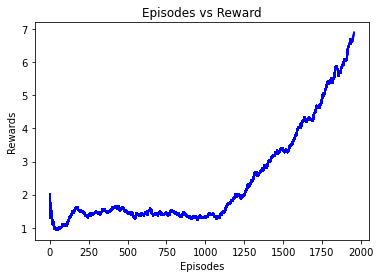

In [ ]:
rewards, episodes = [], []
best_eval_reward = 0
for e in range(1957):
    done = False
    score = 0

    history = np.zeros([5, 84, 84], dtype=np.uint8)
    step = 0
    d = False
    state = env.reset()
    next_state = state
    life = number_lives

    get_init_state(history, state)

    while not done:
        step += 1
        frame += 1

        # Perform a fire action if ball is no longer on screen to continue onto next life
        if step > 1 and len(np.unique(next_state[:189] == state[:189])) < 2:
            action = 0
        else:
            action = agent.get_action(np.float32(history[:4, :, :]) / 255.)
        state = next_state
        next_state, reward, done, info = env.step(action + 1)
        
        frame_next_state = get_frame(next_state)
        history[4, :, :] = frame_next_state
        terminal_state = check_live(life, info['ale.lives'])

        life = info['ale.lives']
        r = np.clip(reward, -1, 1) 
        r = reward

        # Store the transition in memory 
        agent.memory.push(deepcopy(frame_next_state), action, r, terminal_state)
        # Start training after random sample generation
        if(frame >= train_frame):
            agent.train_policy_net(frame)
            # Update the target network only for Double DQN only
            if double_dqn and (frame % update_target_network_frequency)== 0:
                agent.update_target_net()
        score += reward
        history[:4, :, :] = history[1:, :, :]
            
        if done:
            evaluation_reward.append(score)
            rewards.append(np.mean(evaluation_reward))
            episodes.append(e)
            pylab.plot(episodes, rewards, 'b')
            pylab.xlabel('Episodes')
            pylab.ylabel('Rewards') 
            pylab.title('Episodes vs Reward')
            pylab.savefig("./save_graph/breakout_dqn1.png") # save graph for training visualization
            
            # every episode, plot the play time
            print("episode:", e, "  score:", score, "  memory length:",
                  len(agent.memory), "  epsilon:", agent.epsilon, "   steps:", step,
                  "   lr:", agent.optimizer.param_groups[0]['lr'], "    evaluation reward:", np.mean(evaluation_reward))

            # if the mean of scores of last 100 episode is bigger than 5 save model
            ### Change this save condition to whatever you prefer ###
            if np.mean(evaluation_reward) > 5 and np.mean(evaluation_reward) > best_eval_reward:
                torch.save(agent.policy_net, "./save_model/breakout_dqn1.pth")
                best_eval_reward = np.mean(evaluation_reward)